In [1]:
import nltk
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD

from future.utils import iteritems
import os

In C:\Users\evkikum\AppData\Local\Continuum\Anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\evkikum\AppData\Local\Continuum\Anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\evkikum\AppData\Local\Continuum\Anaconda3\envs\tsa_course\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
os.chdir(r"C:\Users\evkikum\OneDrive - Ericsson AB\UseCaseData\NLP\LayProgrammer")

In [3]:
wordnet_lemmatizer = WordNetLemmatizer()

In [4]:
titles = [line.rstrip() for line in open('data/all_book_titles.txt')]
stopwords = set(w.rstrip() for w in open('data/stopwords.txt'))
stopwords = stopwords.union({
    'introduction', 'edition','series','application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second','fourth'
})

In [5]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

In [6]:
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []

In [7]:
for title in titles:
    try:
        ##title = title.encode('ascii','ignore')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except:
        pass
    

In [8]:
print("len(word_index_map) ", len(word_index_map))

len(word_index_map)  2071


In [9]:
def token_to_vectors(tokens):
    x = np.zeros(len(word_index_map))
    for token in tokens:
        if token in word_index_map:
            i = word_index_map[token]
            x[i] = 1
        ##x = x/x.sum()
    return x

In [10]:
df = pd.DataFrame()

In [11]:
for tokens in all_tokens:
    data = pd.DataFrame()
    x = token_to_vectors(tokens)
    data['x'] = x
    data = data.T
    data = data.reset_index()
    data = data.drop(['index'], axis = 1)
    df = df.append(data)

In [12]:
df = df.reset_index()
df = df.drop(['index'], axis = 1)


In [13]:
model = TruncatedSVD()
Z = model.fit_transform(df)

In [14]:
Z

array([[ 0.023387  ,  0.02368822],
       [ 0.04082562,  0.05841015],
       [ 0.06161154, -0.00540173],
       ...,
       [ 0.14270922, -0.02858886],
       [ 0.15898756, -0.03036842],
       [ 0.15040521, -0.01266548]])

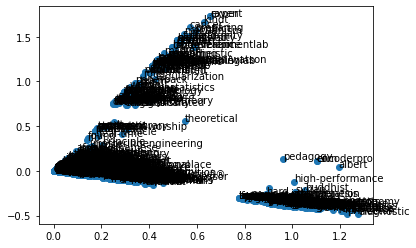

In [15]:
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(word_index_map)):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.show()